<a href="https://colab.research.google.com/github/AUTU8M/cancer-Detection/blob/main/brain_tumour_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
!unzip /content/drive/MyDrive/Code/braintumor-detection.zip

Archive:  /content/drive/MyDrive/Code/braintumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import shutil
import os
import glob

In [3]:
#count the number of images in the respective classes 0-brain tumor 1-healthy
ROOT_DIR = '/content/brain_tumor_dataset'
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len( os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()


dict_items([('yes', 155), ('no', 98)])

#we'll split the data such that
  * 70% for the training
  * 15% for the validation
  * 15% for the testing

In [4]:
def datafolder(p,split):

  #we will create a train folder

  if not os.path.exists('./'+p):
    os.mkdir('./'+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs('./'+p+'/'+dir)

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),
                                size=(math.floor(split*number_of_images[dir])-2),
                                replace=False):
        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join('./'+p,dir)
        shutil.copy(O,D)
        os.remove(O)

  else:
   print(f'{p} folder already exists')


In [5]:
datafolder('train',0.7)

In [6]:
datafolder('validation',0.15)

In [7]:
datafolder('test',0.15)

#Model Build

In [8]:
!pip install tensorflow

In [34]:
from keras.layers import Conv2D, Dense , Dropout, Flatten, MaxPool2D, GlobalMaxPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras


In [10]:
#CNN Model

model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3), activation='relu', input_shape=(224,224,3)))

model.add(Conv2D(filters=32,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate= 0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate= 0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,944,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,967,649 (45.65 MB)

 Trainable params: 11,967,649 (45.65 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

#Prepareing our data using data generator

In [12]:
def preprocessingimages1(path):
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image


In [13]:
path='/content/train'
train_data=preprocessingimages1(path)

Found 172 images belonging to 2 classes.


In [14]:
def preprocessingimages2(path):
  image_data=ImageDataGenerator(rescale=1/255)
  image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image


In [15]:
path='/content/test'
test_data=preprocessingimages2(path)

Found 33 images belonging to 2 classes.


In [16]:
path='/content/validation'
val_data=preprocessingimages2(path)

Found 33 images belonging to 2 classes.


In [17]:
#early stopping and model check point
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3, verbose=1,mode='auto')

#Model check point
ms=ModelCheckpoint(monitor='val_accuracy',filepath="./bestmodel.h5",verbose=1,save_best_only=True,mode='auto')

cd=[es,ms]

# Model training

In [18]:
hs = model.fit(train_data,
               steps_per_epoch = 8,
               epochs = 30,
               verbose = 1,
               validation_data = val_data,
               validation_steps = 16,
               callbacks = cd)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step - accuracy: 0.6084 - loss: 1.3507

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 1: val_accuracy improved from -inf to 0.69697, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6147 - loss: 1.2948 - val_accuracy: 0.6970 - val_loss: 0.5692
Epoch 2/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.6663 - loss: 0.5936
Epoch 2: val_accuracy improved from 0.69697 to 0.72727, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 425ms/step - accuracy: 0.6713 - loss: 0.5946 - val_accuracy: 0.7273 - val_loss: 0.5532
Epoch 3/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.7417 - loss: 0.5297
Epoch 3: val_accuracy did not improve from 0.72727
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.7481 - loss: 0.5292 - val_accuracy: 0.6970 - val_loss: 0.6400
Epoch 4/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.7435 - loss: 0.5518
Epoch 4: val_accuracy did not improve from 0.72727
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 245ms/step - accuracy: 0.7422 - loss: 0.5587 - val_accuracy: 0.7273 - val_loss: 0.5458
Epoch 5/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.8129 - loss: 0.4637
Epoch 5: val_accuracy did not improve from 0.72727
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 278ms/step - accuracy: 0.8001 - loss: 0.4756 - val_accuracy: 0.6970 - val_loss: 0.6054
Epoch 5: early stopping


#Model Graphical interpretetion

In [19]:
h=hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

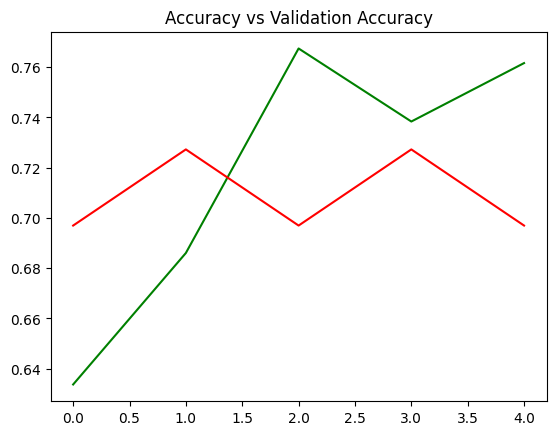

In [20]:
plt.plot(h['accuracy'],c='green')
plt.plot(h['val_accuracy'],c='red')

plt.title('Accuracy vs Validation Accuracy')
plt.show()

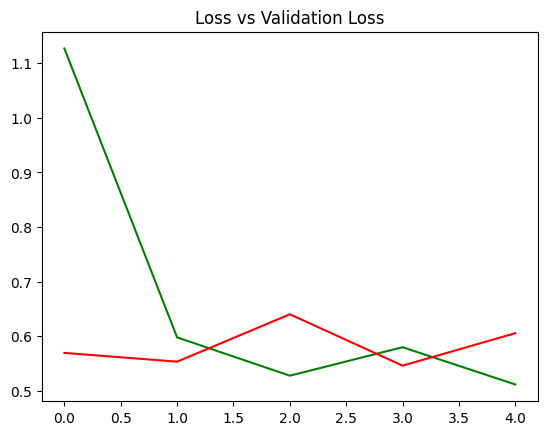

In [21]:
plt.plot(h['loss'],c='green')
plt.plot(h['val_loss'],c='red')

plt.title('Loss vs Validation Loss')
plt.show()

In [22]:
#Model accuracy
from keras.models import load_model
model=load_model('/content/bestmodel.h5')

#Model accuracy

In [23]:
acc = model.evaluate(test_data)[1]
print(f'The accuracy of the model is {acc*100} %')


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 917ms/step - accuracy: 0.8163 - loss: 0.4917
The accuracy of the model is 81.81818127632141 %


In [24]:
from keras.preprocessing.image import  load_img,img_to_array

In [25]:
train_data.class_indices

{'no': 0, 'yes': 1}

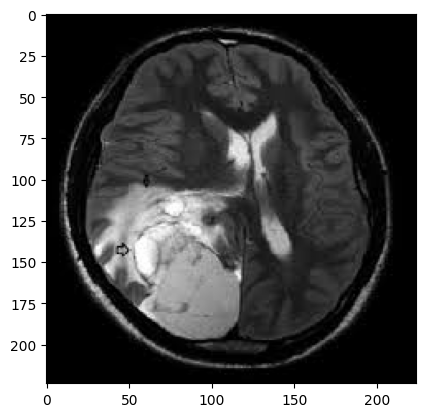

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
this person have brain tumour


In [28]:
path = '/content/brain_tumor_dataset/yes/Y245.jpg'
img = load_img(path,target_size=(224,224))

input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr,axis=0)

pred = model.predict(input_arr)[0][0]
pred

if pred==0:
  print('this person is healthy')

else:
  print('this person have brain tumour')
